<a href="https://colab.research.google.com/github/chunter3/Data_Analytics_Projects/blob/master/K_Means_Clustering_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import load_boston, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

%matplotlib inline

In [ ]:
# Problem 1 (Start)

In [ ]:
# Cleaning up the data and generating a dataset for auto-mpg.data

auto_dataset_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto_dataset_hpavg = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, names=auto_dataset_cols)
imputer = SimpleImputer(missing_values='?', strategy='constant', fill_value=np.nan)
imputer = imputer.fit(auto_dataset_hpavg)
auto_dataset_hpavg = imputer.transform(auto_dataset_hpavg)
auto_dataset_hpavg = pd.DataFrame(auto_dataset_hpavg, columns=auto_dataset_cols)
auto_dataset_hpavg['horsepower'] = pd.to_numeric(auto_dataset_hpavg['horsepower'])
auto_dataset_hpavg['horsepower'] = auto_dataset_hpavg['horsepower'].fillna(auto_dataset_hpavg['horsepower'].mean())
auto_dataset_hpavg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130.0,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
2,18,8,318,150.0,3436,11,70,1,plymouth satellite
3,16,8,304,150.0,3433,12,70,1,amc rebel sst
4,17,8,302,140.0,3449,10.5,70,1,ford torino


<function matplotlib.pyplot.show>

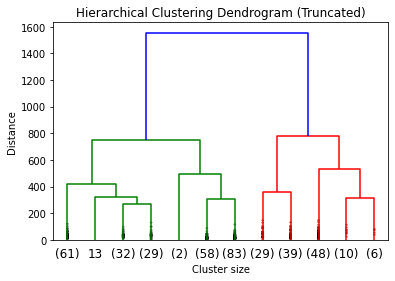

In [ ]:
# Generating a dendrogram for the hierarchical clustering
X = auto_dataset_hpavg.loc[:, ['mpg','displacement','horsepower','weight','acceleration']].values
Z = linkage(X,'average')
dendrogram(Z, truncate_mode='lastp',p=12,leaf_font_size=12,show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show

In [ ]:
# Performing hierachical clustering & initializing KMeans
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average').fit(X)
kmeans = KMeans()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)


[2 2 2 2 2 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 2 2 0
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 0 2 1
 1 1 0 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 1 1 1 1 2 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 0 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 2 1 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 2 1 1 2 2 0 0 0 0 0 2
 1 1 1 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0 2
 0 2 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 1 1 2 2 0 0 0
 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


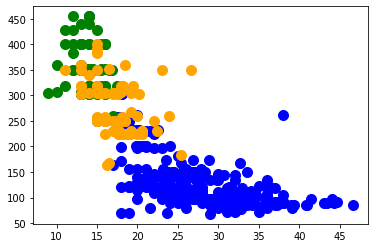

In [ ]:
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc==0,0], X[y_hc==0,1],s=100, c='blue') # Cluster 1
plt.scatter(X[y_hc==1,0], X[y_hc==1,1],s=100, c='green') # Cluster 2
plt.scatter(X[y_hc==2,0], X[y_hc==2,1],s=100, c='orange') # Cluster 3

In [ ]:
# Computing the mean and variance of the 1st cluster (blue cluster)
c_mean = [X[y_hc==0,0].sum()/len(X[y_hc==0,0]),X[y_hc==0,1].sum()/len(X[y_hc==0,1])] # Computes the centroid of a cluster, which is similar to its mean
print("Centroid of blue cluster:",c_mean)
c_array = np.vstack((X[y_hc==0,0], X[y_hc==0,1])).T
kmeans.fit(c_array)
c_var = c_array.var() 
print("Variance of blue cluster:", c_var)

Centroid of blue cluster: [27.365413533834587, 131.93421052631578]
Variance of blue cluster: 4163.293327032334


In [ ]:
# Computing the mean and variance of the 2nd cluster (green cluster)
c_mean = [X[y_hc==1,0].sum()/len(X[y_hc==1,0]),X[y_hc==1,1].sum()/len(X[y_hc==1,1])] 
print("Centroid of green cluster:",c_mean)
c_array = np.vstack((X[y_hc==1,0], X[y_hc==1,1])).T
kmeans.fit(c_array)
c_var = c_array.var()
print("Variance of green cluster:", c_var)

Centroid of green cluster: [13.8890625, 358.09375]
Variance of green cluster: 30673.271879272474


In [ ]:
# Computing the mean and variance of the 3rd cluster (orange cluster)
c_mean = [X[y_hc==2,0].sum()/len(X[y_hc==2,0]),X[y_hc==2,1].sum()/len(X[y_hc==2,1])] 
print("Centroid of orange cluster:",c_mean)
c_array = np.vstack((X[y_hc==2,0], X[y_hc==2,1])).T
kmeans.fit(c_array)
c_var = c_array.var()
print("Variance of orange cluster:", c_var)

Centroid of orange cluster: [17.510294117647064, 278.9852941176471]
Variance of orange cluster: 18516.695289251733


In [ ]:
# Mean & Variance of discrete attributes based on origin (origin = 1)
origin_1 = auto_dataset_hpavg[auto_dataset_hpavg['origin']==1]
X = origin_1.loc[:, ['mpg','horsepower','weight','acceleration']].values

print("Mean of mpg:", X[:,[0]].mean())
print("Variance of mpg:", X[:,[0]].var())

print("\nMean of horsepower:", X[:,[1]].mean())
print("Variance of horsepower:", X[:,[1]].var())

print("\nMean of weight:", X[:,[2]].mean())
print("Variance of weight:", X[:,[2]].var())

print("\nMean of acceleration:", X[:,[3]].mean())
print("Variance of acceleration:", X[:,[3]].var())

Mean of mpg: 20.083534136546177
Variance of mpg: 40.832379477750344

Mean of horsepower: 118.81476928120647
Variance of horsepower: 1563.2289617448582

Mean of weight: 3361.9317269076305
Variance of weight: 629158.2001580624

Mean of acceleration: 15.033734939759027
Variance of acceleration: 7.538219383558335


In [ ]:
# Mean & Variance of discrete attributes based on origin (origin = 2)
origin_2 = auto_dataset_hpavg[auto_dataset_hpavg['origin']==2]
X = origin_2.loc[:, ['mpg','horsepower','weight','acceleration']].values

print("Mean of mpg:", X[:,[0]].mean())
print("Variance of mpg:", X[:,[0]].var())

print("\nMean of horsepower:", X[:,[1]].mean())
print("Variance of horsepower:", X[:,[1]].var())

print("\nMean of weight:", X[:,[2]].mean())
print("Variance of weight:", X[:,[2]].var())

print("\nMean of acceleration:", X[:,[3]].mean())
print("Variance of acceleration:", X[:,[3]].var())

Mean of mpg: 27.891428571428573
Variance of mpg: 44.565355102040805

Mean of horsepower: 81.24198250728863
Variance of horsepower: 404.79322051186165

Mean of weight: 2423.3
Variance of weight: 236711.72428571447

Mean of acceleration: 16.787142857142857
Variance of acceleration: 9.143691836734693


In [ ]:
# Mean & Variance of discrete attributes based on origin (origin = 3)
origin_3 = auto_dataset_hpavg[auto_dataset_hpavg['origin']==3]
X = origin_3.loc[:, ['mpg','horsepower','weight','acceleration']].values

print("Mean of mpg:", X[:,[0]].mean())
print("Variance of mpg:", X[:,[0]].var())

print("\nMean of horsepower:", X[:,[1]].mean())
print("Variance of horsepower:", X[:,[1]].var())

print("\nMean of weight:", X[:,[2]].mean())
print("Variance of weight:", X[:,[2]].var())

print("\nMean of acceleration:", X[:,[3]].mean())
print("Variance of acceleration:", X[:,[3]].var())

Mean of mpg: 30.450632911392397
Variance of mpg: 36.61920846018268

Mean of horsepower: 79.83544303797468
Variance of horsepower: 313.5045665758692

Mean of weight: 2221.227848101266
Variance of weight: 101418.25188271108

Mean of acceleration: 16.172151898734175
Variance of acceleration: 3.773401698445763


In [ ]:
# Problem 1 (End)

In [ ]:
# Problem 2 (Start)

In [ ]:
# Loading the boston dataset and scaling it via StandardScaler and PCA

boston = load_boston()
scaler = StandardScaler()
pca = PCA(2)
boston_scal = scaler.fit_transform(boston.data)
boston_scal = pca.fit_transform(boston_scal)

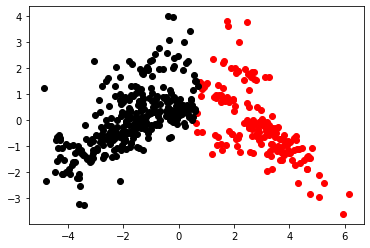


Silhouette score: 0.5443801950361548


In [ ]:
# Performing Kmeans analysis (2 clusters)
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(boston_scal)
cluster1 = boston_scal[label == 0]
cluster2 = boston_scal[label == 1]
plt.scatter(cluster1[:,0] , cluster1[:,1] , color = 'red')
plt.scatter(cluster2[:,0] , cluster2[:,1] , color = 'black')
plt.show()

print("\nSilhouette score:",metrics.silhouette_score(boston_scal, label, metric='euclidean'))

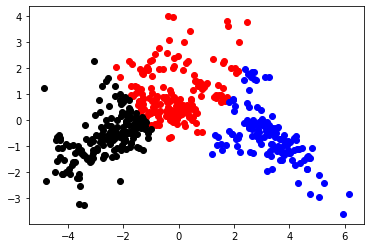


Silhouette score: 0.45973695868043046


In [ ]:
# Performing Kmeans analysis (3 clusters)
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(boston_scal)
cluster1 = boston_scal[label == 0]
cluster2 = boston_scal[label == 1]
cluster3 = boston_scal[label == 2]
plt.scatter(cluster1[:,0] , cluster1[:,1] , color = 'red')
plt.scatter(cluster2[:,0] , cluster2[:,1] , color = 'black')
plt.scatter(cluster3[:,0] , cluster3[:,1] , color = 'blue')
plt.show()
print("\nSilhouette score:",metrics.silhouette_score(boston_scal, label, metric='euclidean'))

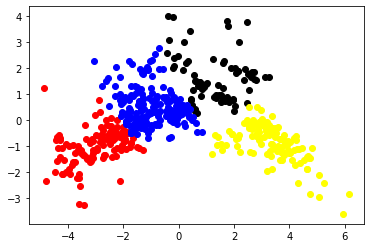


Silhouette score: 0.4490786150099788


In [ ]:
# Performing Kmeans analysis (4 clusters)
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(boston_scal)
cluster1 = boston_scal[label == 0]
cluster2 = boston_scal[label == 1]
cluster3 = boston_scal[label == 2]
cluster4 = boston_scal[label == 3]
plt.scatter(cluster1[:,0] , cluster1[:,1] , color = 'red')
plt.scatter(cluster2[:,0] , cluster2[:,1] , color = 'black')
plt.scatter(cluster3[:,0] , cluster3[:,1] , color = 'blue')
plt.scatter(cluster4[:,0] , cluster4[:,1] , color = 'yellow')
plt.show()
print("\nSilhouette score:",metrics.silhouette_score(boston_scal, label, metric='euclidean'))

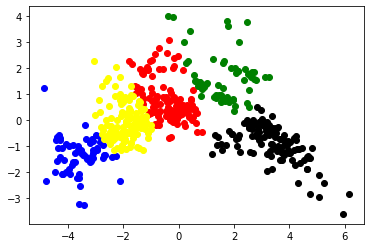


Silhouette score: 0.4203658752426395


In [ ]:
# Performing Kmeans analysis (5 clusters)
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(boston_scal)
cluster1 = boston_scal[label == 0]
cluster2 = boston_scal[label == 1]
cluster3 = boston_scal[label == 2]
cluster4 = boston_scal[label == 3]
cluster5 = boston_scal[label == 4]
plt.scatter(cluster1[:,0] , cluster1[:,1] , color = 'red')
plt.scatter(cluster2[:,0] , cluster2[:,1] , color = 'black')
plt.scatter(cluster3[:,0] , cluster3[:,1] , color = 'blue')
plt.scatter(cluster4[:,0] , cluster4[:,1] , color = 'yellow')
plt.scatter(cluster5[:,0] , cluster5[:,1] , color = 'green')
plt.show()

print("\nSilhouette score:",metrics.silhouette_score(boston_scal, label, metric='euclidean'))

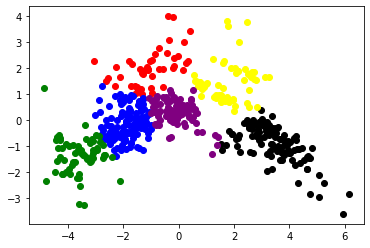


Silhouette score: 0.4477929682365125


In [ ]:
# Performing Kmeans analysis (6 clusters)
kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(boston_scal)
cluster1 = boston_scal[label == 0]
cluster2 = boston_scal[label == 1]
cluster3 = boston_scal[label == 2]
cluster4 = boston_scal[label == 3]
cluster5 = boston_scal[label == 4]
cluster6 = boston_scal[label == 5]
plt.scatter(cluster1[:,0] , cluster1[:,1] , color = 'red')
plt.scatter(cluster2[:,0] , cluster2[:,1] , color = 'black')
plt.scatter(cluster3[:,0] , cluster3[:,1] , color = 'blue')
plt.scatter(cluster4[:,0] , cluster4[:,1] , color = 'yellow')
plt.scatter(cluster5[:,0] , cluster5[:,1] , color = 'green')
plt.scatter(cluster6[:,0] , cluster6[:,1] , color = 'purple')
plt.show()
print("\nSilhouette score:",metrics.silhouette_score(boston_scal, label, metric='euclidean'))

In [ ]:
boston = load_boston()
scaler = StandardScaler()
boston_scal = scaler.fit_transform(boston.data)
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(boston_scal)
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# Mean of all features for the first cluster w/in optimal clustering
cluster1 = boston_scal[label == 0]
cluster2 = boston_scal[label == 1]
print("Mean of each attribute (1st cluster):\n")
print("CRIM:",cluster1[:,0].mean())
print("ZN:",cluster1[:,1].mean())
print("INDUS:",cluster1[:,2].mean())
print("CHAS:",cluster1[:,3].mean())
print("NOX:",cluster1[:,4].mean())
print("RM:",cluster1[:,5].mean())
print("AGE:",cluster1[:,6].mean())
print("DIS:",cluster1[:,7].mean())
print("RAD:",cluster1[:,8].mean())
print("TAX:",cluster1[:,9].mean())
print("PTRATIO:",cluster1[:,10].mean())
print("B:",cluster1[:,11].mean())
print("LSTAT:",cluster1[:,12].mean(),"\n")
print("Mean of each attribute (2nd cluster):\n")
print("CRIM:",cluster2[:,0].mean())
print("ZN:",cluster2[:,1].mean())
print("INDUS:",cluster2[:,2].mean())
print("CHAS:",cluster2[:,3].mean())
print("NOX:",cluster2[:,4].mean())
print("RM:",cluster2[:,5].mean())
print("AGE:",cluster2[:,6].mean())
print("DIS:",cluster2[:,7].mean())
print("RAD:",cluster2[:,8].mean())
print("TAX:",cluster2[:,9].mean())
print("PTRATIO:",cluster2[:,10].mean())
print("B:",cluster2[:,11].mean())
print("LSTAT:",cluster2[:,12].mean(), "\n")
print("Centroids:",kmeans.cluster_centers_)

Mean of each attribute (1st cluster):

CRIM: 0.7251456565188821
ZN: -0.4877223646701313
INDUS: 1.1531126384179924
CHAS: -0.0054123686440033895
NOX: 1.0867690034807838
RM: -0.45226302035956845
AGE: 0.8087604128144869
DIS: -0.849865095929965
RAD: 1.0851445037313692
TAX: 1.1737306044371143
PTRATIO: 0.5312481131904198
B: -0.6067932120021415
LSTAT: 0.8297874631907967 

Mean of each attribute (2nd cluster):

CRIM: -0.39012395502687586
ZN: 0.2623916673149339
INDUS: -0.6203675896656118
CHAS: 0.002911821428536735
NOX: -0.584675117374156
RM: 0.24331475563415747
AGE: -0.43510818561752207
DIS: 0.4572222552571555
RAD: -0.5838011463843534
TAX: -0.6314599300467149
PTRATIO: -0.2858082554246488
B: 0.3264510593446304
LSTAT: -0.4464206108959614 

Centroids: [[ 0.72514566 -0.48772236  1.15311264 -0.00541237  1.086769   -0.45226302
   0.80876041 -0.8498651   1.0851445   1.1737306   0.53124811 -0.60679321
   0.82978746]
 [-0.39012396  0.26239167 -0.62036759  0.00291182 -0.58467512  0.24331476
  -0.43510819 

In [ ]:
# Problem 2 (End)

In [ ]:
# Problem 3 (Start)

In [ ]:
# Loading the wine dataset and scaling it via StandardScaler and PCA
wine = load_wine()
scaler = StandardScaler()
pca = PCA(2)
wine_scal = scaler.fit_transform(wine.data)
wine_scal = pca.fit_transform(wine_scal)

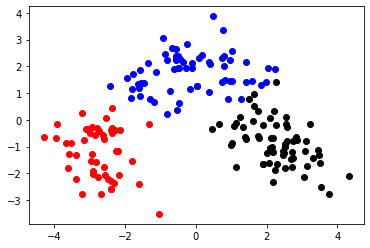


Silhouette score: 0.5610505693103248


In [ ]:
# Performing Kmeans analysis
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(wine_scal)
cluster1 = wine_scal[label == 0]
cluster2 = wine_scal[label == 1]
cluster3 = wine_scal[label == 2]
plt.scatter(cluster1[:,0] , cluster1[:,1] , color = 'red')
plt.scatter(cluster2[:,0] , cluster2[:,1] , color = 'black')
plt.scatter(cluster3[:,0] , cluster3[:,1] , color = 'blue')
plt.show()
print("\nSilhouette score:",metrics.silhouette_score(wine_scal, label, metric='euclidean'))

In [ ]:
# Homogenity & completeness score for 1st cluster in optimal clustering
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(wine_scal)
print("Homogenity:", metrics.homogeneity_score(wine.target,label))
print("Completeness:", metrics.completeness_score(wine.target,label))

Homogenity: 0.8859092326545044
Completeness: 0.8829240334944822


In [ ]:
# Problem 3 (End)